# Applying Linear Regression from scratch (Normal Equations Method)

Since, matrix operations like transpose etc have been used, its best to run all cells together because running multiple times, the cell having transpose operation, may cause dimensionality error in matrix multiplication.

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading and cleaning the dataset (Data Ingestion):

In [178]:
data = pd.read_csv("historical_data.csv")
print(data.shape)
print(data)

(643, 12)
    symbol    date_txn    open     low    high  close_price     volume  \
0      SPY  11/10/2015  207.51  207.19  208.60       208.55   71844000   
1      SPY  11/11/2015  208.88  207.66  208.94       207.67   67251000   
2      SPY  11/12/2015  206.50  204.82  207.06       204.84  118209400   
3      SPY  11/13/2015  204.35  202.44  204.67       202.54  145494400   
4      SPY  11/16/2015  202.32  202.18  205.69       205.62  112996000   
5      SPY  11/17/2015  205.99  204.88  207.04       205.47  113429400   
6      SPY  11/18/2015  206.04  205.99  208.90       208.73  113064100   
7      SPY  11/19/2015  208.59  208.20  209.05       208.55   81363500   
8      SPY  11/20/2015  209.45  208.86  210.12       209.31   89556300   
9      SPY  11/23/2015  209.31  208.52  209.98       209.07   63829000   
10     SPY  11/24/2015  207.87  207.41  209.83       209.35   96553500   
11     SPY  11/25/2015  209.50  209.01  209.74       209.32   50785600   
12     SPY  11/27/2015  209.

In [179]:
#Setting date_txn as the index
data.index = pd.to_datetime(data.pop('date_txn'))

In [180]:
#Removing unnecessary features having same values for all examples
#Removing 'symbol','name' and 'class_type_of'
data.pop('symbol')
data.pop('name')
data.pop('class_type_of')
#Removing examples/rows having NaN
data_new = data.dropna()
print(data_new)

              open     low    high  close_price     volume  lead_1  lead_5  \
date_txn                                                                     
2015-11-10  207.51  207.19  208.60       208.55   71844000  207.67  205.47   
2015-11-11  208.88  207.66  208.94       207.67   67251000  204.84  208.73   
2015-11-12  206.50  204.82  207.06       204.84  118209400  202.54  208.55   
2015-11-13  204.35  202.44  204.67       202.54  145494400  205.62  209.31   
2015-11-16  202.32  202.18  205.69       205.62  112996000  205.47  209.07   
2015-11-17  205.99  204.88  207.04       205.47  113429400  208.73  209.35   
2015-11-18  206.04  205.99  208.90       208.73  113064100  208.55  209.32   
2015-11-19  208.59  208.20  209.05       208.55   81363500  209.31  209.56   
2015-11-20  209.45  208.86  210.12       209.31   89556300  209.07  208.69   
2015-11-23  209.31  208.52  209.98       209.07   63829000  209.35  210.68   
2015-11-24  207.87  207.41  209.83       209.35   96553500  209.

## Calculating terms required in usage of Normal Equations Method:
Since, there are a relatively less number of features(7), we are using Normal Equations Method instead of Gradient Descent.
Let 'theta' be the parameter vector of our hypothesis(prediction), X be input vector(which has feature values) and y be the true value vector for the examples in X, i.e.:

                                         h(x) = (theta)' X
Then, by Normal Equation,
                                         
                                         theta = inverse(X'X) X' y
In the code -
'Xt' represents transpose of ', i.e., X' and 'invt' represents inverse of (X'X)

In [181]:
#Declaring X(Input) and y(true value) matrices for Regression
y = data_new['close_price']
data_new.pop('close_price')
X = data_new
Xm = np.matrix(X)
ym = np.matrix(y)
ym = ym.transpose()

In [182]:
#Adding bias feature having all 1's in X
o = np.ones((630,1))
Xm = np.c_[o,Xm]

## Splitting into Training and Testing Datasets:
Training Set(66%) - 415 examples &
Testing Set(34%) - 215 examples

The ratio 66:34 gave approximately the least Mean Squared Error(MSE) in the Testing Set. Ratio can be changed at will by replacing '.66' in the value of 'k' below with desired ratio for Training Set.

In [183]:
k = int(.66*630)
Xtest = Xm[k:,:]
Xtet = Xtest.transpose()
ytest = ym[k:,:]
Xm = Xm[:k,:]
ym = ym[:k,:]
print(Xm.shape,ym.shape,Xtest.shape,ytest.shape,k)

(415, 8) (415, 1) (215, 8) (215, 1) 415


In [184]:
#Terms X' and inv(X'X)
Xt = Xm.transpose()
invt = Xt * Xm
invt = invt.I


In [185]:
#Calculating parameter vector 'theta'
theta = invt * Xt * ym
theta = theta.transpose()
print("The coefficient/parameter vector: \n",theta)

The coefficient/parameter vector: 
 [[ 3.10455257e+00 -4.34160155e-01  2.91595003e-01  1.62778644e-01
  -2.58789173e-09  9.38005616e-01 -1.69224248e-03  3.04768528e-02]]


## Predicting for Testing Set and plotting:

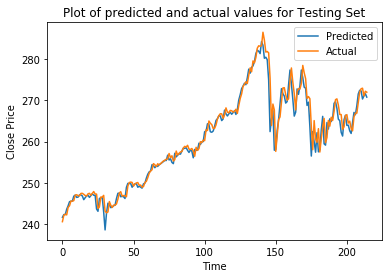

In [186]:
op = theta * Xtet
op = op.transpose()
plt.plot(op,label = 'Predicted')
plt.plot(ytest, label = 'Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Plot of predicted and actual values for Testing Set')
plt.legend()
plt.show()

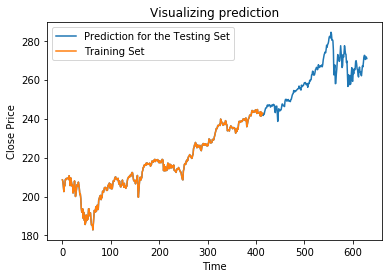

In [187]:
ym_and_op = np.r_[ym,op]
plt.plot(ym_and_op,label = 'Prediction for the Testing Set')
plt.plot(ym, label = 'Training Set')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Visualizing prediction')
plt.legend()
plt.show()

## Mean Squared Error and Average Accuracy of Testing Set prediction:

In [188]:
error = np.array(ytest-op)

erp = (error/ytest)*100
erp = erp.mean()
acc = 100-erp
error = error ** 2
error = error.sum()/len(ytest)

print("Average Accuracy is",acc,"%, and the Mean Square Error in the Test Dataset prediction is",error,".\n")

Average Accuracy is 99.81299446747381 %, and the Mean Square Error in the Test Dataset prediction is 4.734837932988037 .



## Comparing Predicted and Actual outputs of Testing Dataset:

In [189]:
print("Predicted              Actual\n")
i=0
while i!=len(op):
    print(op[i],"     ",ytest[i],"\n")
    i+=1

Predicted              Actual

[[241.61299839]]       [[240.55]] 

[[242.2717463]]       [[242.11]] 

[[242.26742346]]       [[242.37]] 

[[243.55977796]]       [[242.19]] 

[[244.40498378]]       [[244.01]] 

[[245.40189959]]       [[244.42]] 

[[245.52450223]]       [[245.56]] 

[[245.55037825]]       [[245.53]] 

[[246.74129451]]       [[245.66]] 

[[247.0070899]]       [[246.99]] 

[[246.45249169]]       [[247.1]] 

[[246.51061039]]       [[246.88]] 

[[247.07412871]]       [[246.82]] 

[[247.04867242]]       [[247.42]] 

[[246.80826193]]       [[247.43]] 

[[245.89127466]]       [[247.2]] 

[[246.37520305]]       [[246.91]] 

[[246.78920242]]       [[246.77]] 

[[246.94938411]]       [[247.32]] 

[[246.44841325]]       [[247.44]] 

[[246.87939344]]       [[246.96]] 

[[247.32297759]]       [[247.41]] 

[[246.96814495]]       [[247.87]] 

[[246.9624488]]       [[247.26]] 

[[243.62545105]]       [[247.25]] 

[[243.06783612]]       [[243.76]] 

[[246.1901295]]       [[244.12]] 

[[2